# Data Analysis and Visualization of the Survey

This notebook contains all the code that is necessary for a profound analysis of the dataset and is structured as follows:
_____

**1. Import libariers**

Within this code block, the necessary analytical as wellas visualization librariers are imported.

**2. Import the dataset**

The data from the survey is imported and assigned to a variable to work with.

**3. Set styles**

In this section, styles are configured for the upcoming plots.

**4. Perpare the plotting order for plots**

Since the net income values are categorial, namely strings, it is necessary to manually set up an order. 
The order is ascending, i.e. from the lowest to the highest value. The order is applied in the 'age' vs. 'net' income'
illustration.

**5. Draw data points**

This section contains several sub-sections. Each section is responsible for plotting values for certain features coming from the input data (see 2. Import the dataset, line 5 f).

Four different charts are being plotted:

   *5.1 Distribution of age among all data points*
    
   *5.2 Amount of financial products each interviewee owns*
    
   *5.3 Age vs Net income illustration*
    
   *5.4 Occurences of financial products*

_______






## 1. Import librariers

In [1]:
# import data analysis libaries
import numpy as np
import pandas as pd

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# makes matplotlib executable in jupyter
%matplotlib inline

## 2. Import the dataset

In [2]:
# generate a DataFrame
finance_data = pd.read_excel('data_financeproducts.xlsx')

# show an excerpt
finance_data.head()

,Sex,Age,Net income,Creditcard ownership,Amount of financial products,Stocks,Investment fonds,Bond issues,Savings certificate,Giro account,Day-to-day money account,Credit card,Fixed deposit account,Life insurance,Riester pension,Housing saving
0,male,28,1250-1499 €,yes,3,no,no,no,no,yes,yes,yes,no,no,no,no
1,male,56,5000-5999 €,yes,1,no,no,no,no,no,no,yes,no,no,no,no
2,male,28,1250-1499 €,yes,3,no,no,no,no,yes,yes,yes,no,no,no,no
3,male,29,2000-2499 €,yes,3,no,no,no,no,yes,no,yes,no,no,no,yes
4,male,29,2000-2499 €,yes,2,no,no,no,no,yes,no,yes,no,no,no,no


## 3. Set styles

In [3]:
# import library to modify style parameters
from matplotlib import rcParams

# font styles
fontsizes= {'title' : 20, 'axis': 15, 'ticks': 13}
fontweights= {'title' : 800, 'axis' : 600}

# define styles for the images
rcParams['axes.titlepad'] = 20

# define the output resolution 
output_dpi = 300

# define context and overall grid style
sns.set_context(context="paper")
sns.set(style='white')

## 4. Prepare the plotting order for plots

In [4]:
# pick the values from the column 'net income'
l = list(pd.unique(finance_data['Net income'].values))

# sort the lest
sorted(l)

# remove values to reorder them
l.remove('500-749 €')
l.remove('750-999 €')
l.remove('under 500 €')
l.remove('above 10000 €')

# assign the sorted list to a variable
sortedList = sorted(l)

# insert values to have an ascending order
sortedList.insert(0, '750-999 €' )
sortedList.insert(0, '500-749 €' )
sortedList.insert(0, 'below 500 €' )
sortedList.insert(15, 'above 10000 €' )

## 5. Draw the Data Points

### 5.1 Distribution of age among all data points

C:\Users\oliver.goetz\AppData\Local\Continuum\anaconda3\envs\Masterthesis\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


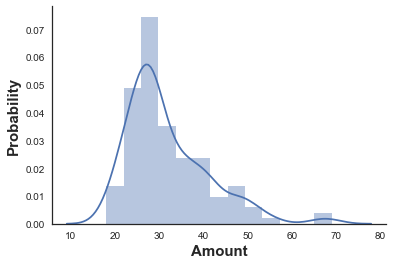

In [5]:
# create a canvas for drawing
fig, ax = plt.subplots()

# draw a distribution plot
sns.distplot(finance_data['Age'], ax=ax)

# adds a title to the chart if necessary
# ax.set_title('Distribution of "Age"',  fontdict={'fontsize' : fontsizes['title'], 'fontweight' : fontweights['title']})

# sets the x- and y-axis labels
ax.set_xlabel('Amount',fontdict={'fontsize' : fontsizes['axis'], 'fontweight' : fontweights['axis']} )
ax.set_ylabel('Probability', fontdict={'fontsize' : fontsizes['axis'], 'fontweight' : fontweights['axis']})

# remove surrounding edges
sns.despine()

# save the figure
plt.savefig('distribution_of_age.png', dpi=output_dpi, bbox_inches='tight')

In [6]:
# compute mean of 'age'
mean_age = finance_data['Age'].mean()
mean_age

31.838461538461537

### 5.2 Amount of financial products each interviewee owns

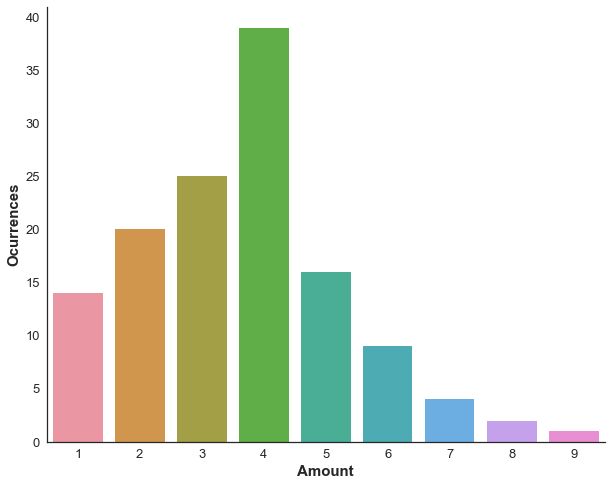

In [7]:
# create a canvas for drawing: 1 row, 2 columns
fig, ax = plt.subplots(figsize=(10,8))

# draw a count plot
sns.countplot(x=finance_data['Amount of financial products'], ax=ax)

# adds a title to the chart if necessary
# ax.set_title('Amount of Financial Products', fontdict={'fontsize' : fontsizes['title'], 'fontweight' : fontweights['title']})

# set the x- and y-labels al well as style their ticks
ax.set_xlabel('Amount',fontdict={'fontsize' : fontsizes['axis'], 'fontweight' : fontweights['axis']} )
ax.set_ylabel('Ocurrences', fontdict={'fontsize' : fontsizes['axis'], 'fontweight' : fontweights['axis']})
ax.tick_params(axis='both', labelsize=fontsizes['ticks'])

# remove surrounding edges
sns.despine()

# save the figure
plt.savefig('amount_of_financial_products.png',dpi=output_dpi, bbox_inches='tight')

### 5.3 'Age' vs 'Net income' illustration

C:\Users\oliver.goetz\AppData\Local\Continuum\anaconda3\envs\Masterthesis\lib\site-packages\seaborn\categorical.py:1407: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


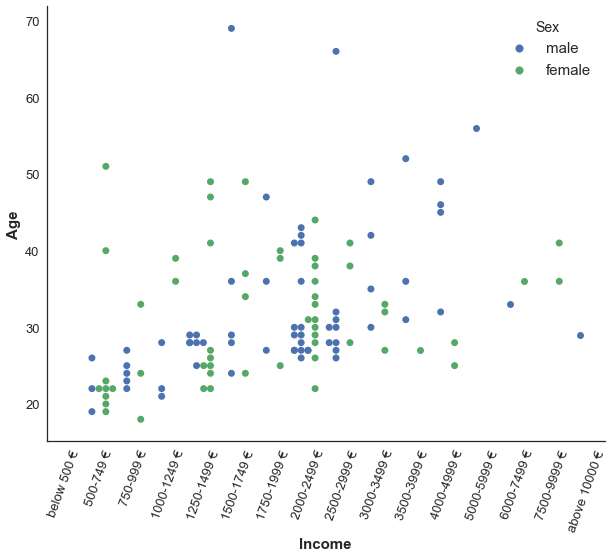

In [8]:
# create a canvas for drawing
fig, ax = plt.subplots(figsize=(10,8))

# scale the font
sns.set(font_scale=1.5)

# draw a swarm plot
sns.swarmplot(y=finance_data['Age'],x=finance_data['Net income'], data=finance_data, dodge=True, 
              hue=finance_data['Sex'], ax=ax, size=7, order=sortedList)

# adds a title to the chart if necessary
# ax.set_title('"Age" and "Net income" occurences', fontdict={'fontsize' : fontsizes['title'], 'fontweight' : fontweights['title']})

# set the x- and y-labels al well as style their ticks
ax.tick_params(axis='both', labelsize=fontsizes['ticks'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_xlabel('Income',fontdict={'fontsize': fontsizes['axis'], 'fontweight': fontweights['axis']})
ax.set_ylabel('Age',fontdict={'fontsize': fontsizes['axis'], 'fontweight': fontweights['axis']})

# remove sorround edges
sns.despine()

# save the figure
plt.savefig('age_vs_netincome.png', dpi=output_dpi, bbox_inches='tight')

### 5.4 Occurences of financial products

In [9]:
# create a new DataFrame with all column names
# .loc[:,...] means: grab all rows
# .loc['Stocks', 'Investment fonds', ...] means: grab all column names
df = finance_data.loc[:,['Stocks', 'Investment fonds', 'Bond issues', 'Savings certificate', 'Giro account', 'Day-to-day money account', 
                      'Credit card', 'Fixed deposit account', 'Life insurance', 'Riester pension', 'Housing saving']]

# convert the column values to an array
column_names = list(df.columns.values)

In [10]:
# initializie a dictionary to store the 'yes' and 'no' amounts for each financial product
counts = {}

# conduct the count for yes and no in the data and store it in the dictionary
for name in column_names:
    yes = df[name][df[name] == 'yes'].count()
    no = df[name][df[name] == 'no'].count()
    counts.update({name: [yes,no]})
print (counts)

{'Stocks': [22, 108], 'Investment fonds': [21, 109], 'Bond issues': [5, 125], 'Savings certificate': [12, 118], 'Giro account': [118, 12], 'Day-to-day money account': [47, 83], 'Credit card': [103, 27], 'Fixed deposit account': [23, 107], 'Life insurance': [42, 88], 'Riester pension': [24, 106], 'Housing saving': [48, 82]}


In [11]:
# create an array for the categories and fill them. It is necessary for proper plotting
yes = []
no = []
for index, name in counts.items():
    yes.append(name[0])
    no.append(name[1])

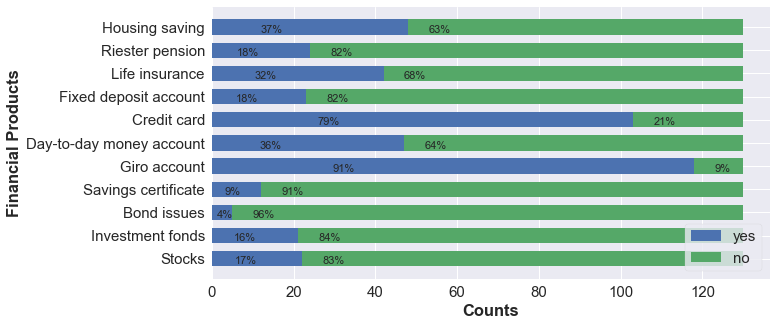

In [12]:
# create a canvas to draw on
fig, ax = plt.subplots(figsize=(10,5))

# define line width and index for the plot
width = 1
ind = np.arange(len(column_names))*1.5

# generate a plot storing the amount of 'yes'
yes_plot=plt.barh(ind, yes, width)

# generate a plot storing the amount of 'no'
no_plot=plt.barh(ind, no, width, left=yes)

# iterate over each yes_plot
for i,b in enumerate(yes_plot):
    
    # get the width of each horizontal bar
    width = b.get_width()
    
    # print the percentage on the corresponding bar
    ax.annotate('{}%'.format(int(np.around(((counts[column_names[i]][0])/130)*100))), 
                xy=(width/4, b.get_y()+0.15), fontsize=11)
       
# iterate over each yes_plot
for i,b in enumerate(no_plot):
    
    # get the x cooordinate and width of each horizontal bar
    x = b.get_x()
    width = b.get_width()
    
    # print the percentage on the corresponding bar
    ax.annotate('{}%'.format(int(np.around(((counts[column_names[i]][1])/130)*100))), xy=(x+5, b.get_y()+0.15), fontsize=11)
    
# style the plot by setting labels for the x- and y-axis
ax.set_yticks(ind)
ax.set_yticklabels(column_names)
ax.set_ylabel('Financial Products', fontdict={'fontweight': fontweights['axis']})
ax.set_xlabel('Counts', fontdict={'fontweight': fontweights['axis']})

# adds a title if necessary
# ax.set_title('Occurence Ratio of Financial Products',fontdict={'fontsize': fontsizes['title'], 'fontweight': fontweights['title']})

# add a legend
ax.legend((yes_plot[0], no_plot[0]), ('yes', 'no'), loc='lower right', frameon=True)

# save the figure
plt.savefig('financial_products.png', bbox_inches="tight", dpi=output_dpi)